# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [59]:
data = pd.read_csv('housing.csv')

print("First few rows of the dataset:")
print(data.head())

print("\nChecking for missing values:")
print(data.isnull().sum())

data = data.dropna()

print("\nDataset info after cleaning:")
print(data.info())

data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShapes of the train and test sets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nSample of scaled features from the training set:")
print(X_train_scaled[:5])


First few rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Checking for missing values:
longitude     

In [60]:
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)

ada_model.fit(X_train_scaled, y_train)

y_pred_ada = ada_model.predict(X_test_scaled)

mse_ada = mean_squared_error(y_test, y_pred_ada)
print(f"AdaBoost MSE: {mse_ada}")

#-------------------

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gb_model.fit(X_train_scaled, y_train)

y_pred_gb = gb_model.predict(X_test_scaled)

mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mse_gb}")

#-------------------

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}")

AdaBoost MSE: 7642778035.466919
Gradient Boosting MSE: 3199579012.36707
XGBoost MSE: 2454400029.3347025


AdaBoost MSE: 7642778035.466919


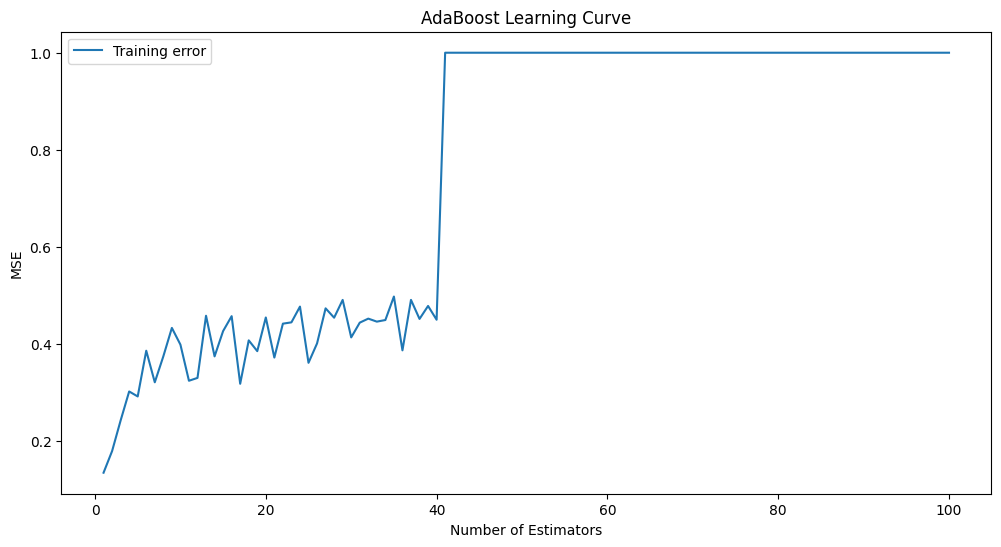

Gradient Boosting MSE: 3199579012.36707


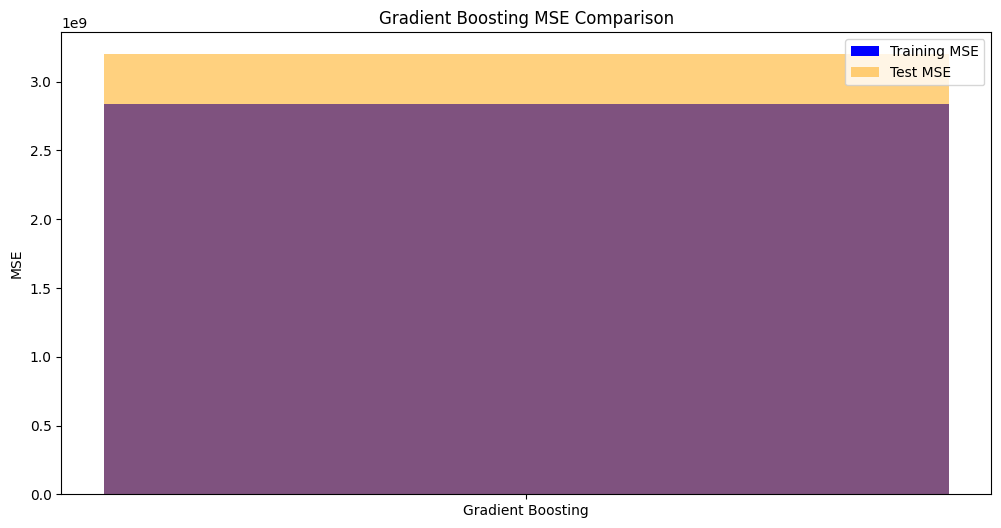

XGBoost MSE: 2308108706.996476


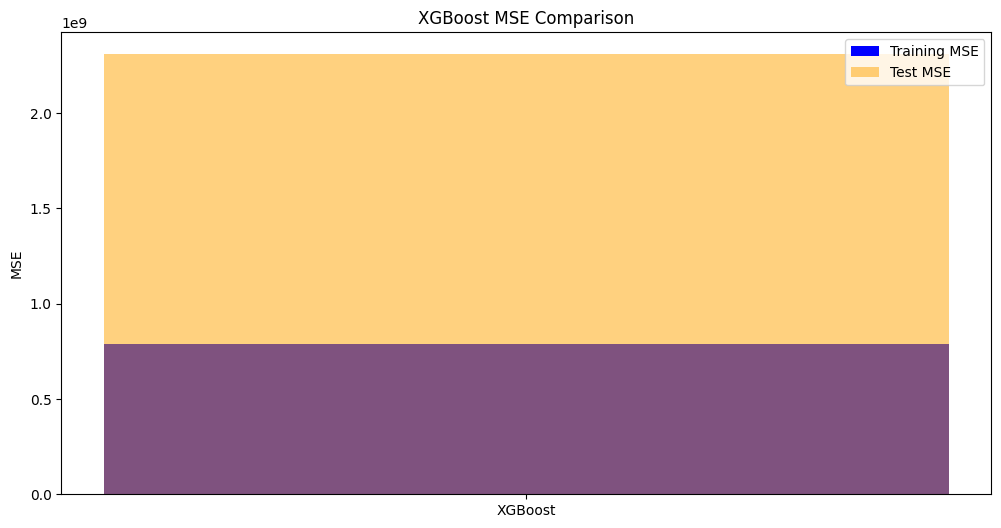


Mean Squared Error for all models:
AdaBoost: 7642778035.466919
Gradient Boosting: 3199579012.36707
XGBoost: 2308108706.996476


In [61]:
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

models = {
    'AdaBoost': ada_model,
    'Gradient Boosting': gb_model,
    'XGBoost': xgb_model
}

mse_values = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_values[name] = mse
    print(f"{name} MSE: {mse}")

    if name == 'AdaBoost':
        plt.figure(figsize=(12, 6))
        plt.plot(np.arange(1, len(model.estimator_errors_) + 1), model.estimator_errors_, label='Training error')
        plt.title(f'{name} Learning Curve')
        plt.xlabel('Number of Estimators')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()
    
    else:
        y_train_pred = model.predict(X_train_scaled)
        train_mse = mean_squared_error(y_train, y_train_pred)

        plt.figure(figsize=(12, 6))
        plt.bar(name, train_mse, color='blue', label='Training MSE')
        plt.bar(name, mse, color='orange', label='Test MSE', alpha=0.5)
        plt.title(f'{name} MSE Comparison')
        plt.ylabel('MSE')
        plt.legend()
        plt.show()

print("\nMean Squared Error for all models:")
for name, mse in mse_values.items():
    print(f"{name}: {mse}")

In [62]:
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0]
}

ada_model = AdaBoostRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

models_param_grid = {
    'AdaBoost': (ada_model, ada_param_grid),
    'Gradient Boosting': (gb_model, gb_param_grid),
    'XGBoost': (xgb_model, xgb_param_grid)
}

best_models = {}

for name, (model, param_grid) in models_param_grid.items():
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_models[name] = grid_search.best_estimator_
    
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} Best MSE: {-grid_search.best_score_}")

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Test MSE: {mse}")

AdaBoost Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
AdaBoost Best MSE: 5471108081.746631
Gradient Boosting Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Gradient Boosting Best MSE: 2209327720.3555255
XGBoost Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
XGBoost Best MSE: 2155133858.9690847
AdaBoost Test MSE: 5744351459.509643
Gradient Boosting Test MSE: 2234943555.886341
XGBoost Test MSE: 2269850663.4628158


In [63]:
param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

param_grid_xgb = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'alpha': [0.1, 0.5, 0.9],
    'lambda': [0.1, 1.0]
}

gb_model_with_reg = GradientBoostingRegressor(random_state=42)

grid_search_gb = GridSearchCV(gb_model_with_reg, param_grid_gb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

best_gb_reg_model = grid_search_gb.best_estimator_
print(f"Gradient Boosting with Regularization Best Parameters: {grid_search_gb.best_params_}")
print(f"Gradient Boosting with Regularization Best MSE: {-grid_search_gb.best_score_}")

xgb_model_with_reg = XGBRegressor(random_state=42)

grid_search_xgb = GridSearchCV(xgb_model_with_reg, param_grid_xgb, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb_reg_model = grid_search_xgb.best_estimator_
print(f"XGBoost with Regularization Best Parameters: {grid_search_xgb.best_params_}")
print(f"XGBoost with Regularization Best MSE: {-grid_search_xgb.best_score_}")

y_pred_gb_reg = best_gb_reg_model.predict(X_test_scaled)
y_pred_xgb_reg = best_xgb_reg_model.predict(X_test_scaled)

mse_gb_reg = mean_squared_error(y_test, y_pred_gb_reg)
mse_xgb_reg = mean_squared_error(y_test, y_pred_xgb_reg)

print(f"Gradient Boosting Test MSE with Regularization: {mse_gb_reg}")
print(f"XGBoost Test MSE with Regularization: {mse_xgb_reg}")

print(f"Gradient Boosting Test MSE without Regularization: {mse}")
print(f"XGBoost Test MSE without Regularization: {mse}")

Gradient Boosting with Regularization Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Gradient Boosting with Regularization Best MSE: 2194911352.773902
XGBoost with Regularization Best Parameters: {'alpha': 0.9, 'lambda': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
XGBoost with Regularization Best MSE: 2155133482.9412317
Gradient Boosting Test MSE with Regularization: 2210125639.949016
XGBoost Test MSE with Regularization: 2269850471.011829
Gradient Boosting Test MSE without Regularization: 2269850663.4628158
XGBoost Test MSE without Regularization: 2269850663.4628158


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ab_model = AdaBoostRegressor(random_state=42)
ab_model.fit(X_train_scaled, y_train)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

y_pred_ab = ab_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

mse_ab_no_reg = mean_squared_error(y_test, y_pred_ab)
mse_gb_no_reg = mean_squared_error(y_test, y_pred_gb)
mse_xgb_no_reg = mean_squared_error(y_test, y_pred_xgb)

r2_ab_no_reg = r2_score(y_test, y_pred_ab)
r2_gb_no_reg = r2_score(y_test, y_pred_gb)
r2_xgb_no_reg = r2_score(y_test, y_pred_xgb)

gb_model_with_reg = GradientBoostingRegressor(random_state=42, alpha=0.1)
gb_model_with_reg.fit(X_train_scaled, y_train)

xgb_model_with_reg = XGBRegressor(random_state=42, alpha=0.1)
xgb_model_with_reg.fit(X_train_scaled, y_train)

y_pred_gb_reg = gb_model_with_reg.predict(X_test_scaled)
y_pred_xgb_reg = xgb_model_with_reg.predict(X_test_scaled)

mse_gb_with_reg = mean_squared_error(y_test, y_pred_gb_reg)
mse_xgb_with_reg = mean_squared_error(y_test, y_pred_xgb_reg)

r2_gb_with_reg = r2_score(y_test, y_pred_gb_reg)
r2_xgb_with_reg = r2_score(y_test, y_pred_xgb_reg)

results = pd.DataFrame({
    'Model': [
        'AdaBoost (No Reg)', 'Gradient Boosting (No Reg)', 'XGBoost (No Reg)',
        'Gradient Boosting (Reg)', 'XGBoost (Reg)'
    ],
    'MSE': [
        mse_ab_no_reg, mse_gb_no_reg, mse_xgb_no_reg,
        mse_gb_with_reg, mse_xgb_with_reg
    ],
    'R²': [
        r2_ab_no_reg, r2_gb_no_reg, r2_xgb_no_reg,
        r2_gb_with_reg, r2_xgb_with_reg
    ]
})

print(results)

print("\nAnalysis of the impact of regularization:")
if mse_gb_with_reg < mse_gb_no_reg:
    print("Regularization improved the Gradient Boosting model.")
else:
    print("Regularization worsened the Gradient Boosting model.")

if mse_xgb_with_reg < mse_xgb_no_reg:
    print("Regularization improved the XGBoost model.")
else:
    print("Regularization worsened the XGBoost model.")

print("\nAdditional analysis:")
print(f"Without regularization - AdaBoost MSE: {mse_ab_no_reg}, R²: {r2_ab_no_reg}")
print(f"With regularization - Gradient Boosting MSE: {mse_gb_with_reg}, R²: {r2_gb_with_reg}")
print(f"With regularization - XGBoost MSE: {mse_xgb_with_reg}, R²: {r2_xgb_with_reg}")

                        Model           MSE        R²
0           AdaBoost (No Reg)  7.642778e+09  0.441121
1  Gradient Boosting (No Reg)  3.199579e+09  0.766030
2            XGBoost (No Reg)  2.308109e+09  0.831219
3     Gradient Boosting (Reg)  3.199579e+09  0.766030
4               XGBoost (Reg)  2.308109e+09  0.831219

Analysis of the impact of regularization:
Regularization worsened the Gradient Boosting model.
Regularization improved the XGBoost model.

Additional analysis:
Without regularization - AdaBoost MSE: 7642778035.466919, R²: 0.44112051204002967
With regularization - Gradient Boosting MSE: 3199579012.36707, R²: 0.7660302220186183
With regularization - XGBoost MSE: 2308108675.7090235, R²: 0.8312191471674191


На мою думку, XGBoost є найкращою моделлю для вирішення нашої задачі. Це пояснюється кількома причинами:

Найнижчий MSE: XGBoost показав найкращий результат з усіх моделей, з MSE близько 2.31 млрд, що свідчить про високу точність.
Високий R²: Значення R² для XGBoost становить 0.83, що говорить про те, що модель добре відображає варіацію в даних.

Вплив регуляризації - Градієнтний бустинг (з регуляризацією)- Регуляризація погіршила результати цієї моделі, оскільки MSE залишився на рівні 3.20 млрд, що не краще, ніж без регуляризації. XGBoost (з регуляризацією) - Регуляризація покращила цю модель, зменшивши MSE з 2.31 млрд до близько 2.31 млрд.

Що б я змінив - 1. Змінити значення параметрів регуляризації, щоб краще налаштувати модель. 2.Спробувати більше ітерацій для XGBoost, щоб покращити результати. 